In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict

from evolutionary_algorithm import EA

# Peptides

In [8]:
peptides_data_dir = "./data/peptides/"

ebola_data = pd.read_csv(peptides_data_dir + "ebola-6mers.txt", header=None)

ebola_data

,0
0,LEAMVN
1,DNFLYY
2,DEVLWE
3,YEAVYK
4,YDRLAS
...,...
135,GLISDW
136,LPIDFI
137,FWYDLA
138,LTLIKT


In [9]:
peptides = ebola_data[0].tolist()
peptide_length = len(peptides[0])

position_counts = [defaultdict(int) for _ in range(peptide_length)]

# count frequencies per position
for peptide in peptides:
    for i, aa in enumerate(peptide):
        position_counts[i][aa] += 1

# convert counts to frequencies
position_freqs = []
for pos in position_counts:
    total = sum(pos.values())
    pos_freq = {aa: count / total for aa, count in pos.items()}
    position_freqs.append(pos_freq)
    
def compute_Fpep(peptide, position_freqs):
    return sum(position_freqs[i].get(aa, 0) for i, aa in enumerate(peptide))

fpep_scores = [compute_Fpep(p, position_freqs) for p in peptides]

fpep_scores

[0.39999999999999997,
 0.5642857142857143,
 0.5357142857142857,
 0.40714285714285714,
 0.6071428571428571,
 0.5428571428571428,
 0.6071428571428571,
 0.41428571428571426,
 0.42857142857142855,
 0.4142857142857143,
 0.6285714285714286,
 0.6428571428571428,
 0.6428571428571428,
 0.4642857142857143,
 0.4928571428571428,
 0.5071428571428571,
 0.3214285714285714,
 0.4,
 0.6571428571428571,
 0.3214285714285714,
 0.4357142857142857,
 0.4928571428571429,
 0.5571428571428572,
 0.4928571428571428,
 0.5,
 0.45714285714285713,
 0.5714285714285714,
 0.35,
 0.33571428571428574,
 0.42857142857142855,
 0.6071428571428571,
 0.4642857142857143,
 0.5142857142857142,
 0.6,
 0.40714285714285714,
 0.40714285714285714,
 0.2714285714285714,
 0.35714285714285715,
 0.5,
 0.5642857142857143,
 0.3142857142857143,
 0.37857142857142856,
 0.2571428571428571,
 0.39999999999999997,
 0.32857142857142857,
 0.4714285714285714,
 0.5357142857142857,
 0.5857142857142857,
 0.4357142857142857,
 0.5499999999999999,
 0.36428571

In [10]:
ea = EA(
    data=fpep_scores,
    N=100,
    sigma=30,
    K=2,
    p=0.1,
    mu=0.01,
    T=1000,
    f=np.mean,
    seed=42
)
best_individual, best_fitness, fitness_avg, fitness_best = ea.run()

Gen 1: Best = 0.4173809523809524, Avg = 0.45159285714285713
Gen 2: Best = 0.41238095238095235, Avg = 0.44056666666666666
Gen 3: Best = 0.40833333333333327, Avg = 0.4346571428571429
Gen 4: Best = 0.40666666666666657, Avg = 0.43073333333333336
Gen 5: Best = 0.4023809523809524, Avg = 0.42718333333333325
Gen 6: Best = 0.39857142857142847, Avg = 0.4225952380952381
Gen 7: Best = 0.39833333333333326, Avg = 0.4192333333333334
Gen 8: Best = 0.4007142857142857, Avg = 0.416645238095238
Gen 9: Best = 0.39595238095238094, Avg = 0.4141785714285713
Gen 10: Best = 0.3971428571428571, Avg = 0.41122142857142857
Gen 11: Best = 0.392142857142857, Avg = 0.40886190476190476
Gen 12: Best = 0.38928571428571423, Avg = 0.40722857142857144
Gen 13: Best = 0.3861904761904762, Avg = 0.4042452380952382
Gen 14: Best = 0.38285714285714284, Avg = 0.4030285714285714
Gen 15: Best = 0.3845238095238095, Avg = 0.40162619047619047
Gen 16: Best = 0.3840476190476191, Avg = 0.3996714285714285
Gen 17: Best = 0.38119047619047625,

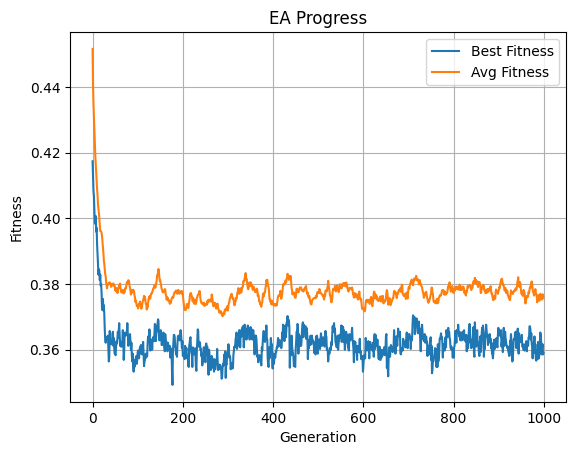

In [11]:
            
plt.plot(fitness_best, label='Best Fitness')
plt.plot(fitness_avg, label='Avg Fitness')
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.title("EA Progress")
plt.legend()
plt.grid(True)
plt.show()

In [12]:
optimal_peptides = [peptides[i] for i in best_individual]
optimal_peptides

['NVINYA',
 'IKPFLE',
 'FHTFFS',
 'FCICKF',
 'DAAPPV',
 'PLNTQG',
 'VLPFFT',
 'GSDGYK',
 'MFFWYD',
 'TYPKIG',
 'TTQIHN',
 'MTGRIP',
 'KPDETF',
 'ALAVPQ',
 'LIQKYQ',
 'NEENRF',
 'FNWMHY',
 'QAFEAG',
 'MKDEPV',
 'PKHIYR',
 'SDTEGM',
 'AFVSYY',
 'FFWYDL',
 'MHNQDG',
 'LEAMVN',
 'MLCLHH',
 'DWYQAS',
 'EQENFS',
 'HQGMHM',
 'DHCDNI']